# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
from numpy.random import seed
seed=2019
np.random.seed(seed)

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


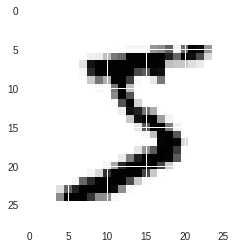

In [30]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [33]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [35]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [40]:
from keras.layers import Activation
model = Sequential() 
model.add(Convolution2D(48, 3, 3, activation='relu', input_shape=(28,28,1))) 
model.add(Dropout(0.5))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(24, 3, 3, activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 10))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':


In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 48)        480       
_________________________________________________________________
dropout_12 (Dropout)         (None, 26, 26, 48)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 32)        13856     
_________________________________________________________________
dropout_13 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 22, 22, 24)        6936      
_________________________________________________________________
dropout_14 (Dropout)         (None, 22, 22, 24)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 20, 20, 16)        3472      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [43]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 16s 271us/step - loss: 0.2813 - acc: 0.9143
Epoch 2/10
60000/60000 [==============================] - 15s 258us/step - loss: 0.1010 - acc: 0.9703
Epoch 3/10
60000/60000 [==============================] - 15s 257us/step - loss: 0.0749 - acc: 0.9772
Epoch 4/10
60000/60000 [==============================] - 16s 260us/step - loss: 0.0625 - acc: 0.9808
Epoch 5/10
60000/60000 [==============================] - 15s 256us/step - loss: 0.0548 - acc: 0.9839
Epoch 6/10
60000/60000 [==============================] - 15s 256us/step - loss: 0.0486 - acc: 0.9846
Epoch 7/10
60000/60000 [==============================] - 15s 256us/step - loss: 0.0455 - acc: 0.9856
Epoch 8/10
60000/60000 [==============================] - 15s 256us/step - loss: 0.0403 - acc: 0.9873
Epoch 9/10
60000/60000 [==============================] - 15s 256us/step - loss: 0.0381 - acc: 0.9878
Epoch 10/10
60000/60000 [==============================] - 15s 256us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [45]:
print(score)

[0.03325843074768782, 0.9905]


In [0]:
y_pred = model.predict(X_test)

In [47]:
print(y_pred[:9])
print(y_test[:9])

[[8.61115694e-08 4.31498309e-11 4.23089296e-06 3.87564396e-05
  4.65462955e-12 7.42919448e-10 1.92060316e-15 9.99956131e-01
  2.28556360e-07 6.49027129e-07]
 [7.23561699e-09 4.97712094e-08 9.99997258e-01 1.75076231e-09
  1.88135596e-09 2.62144776e-12 2.79517258e-06 2.85097241e-11
  3.51851952e-08 6.39618536e-09]
 [5.96626633e-05 9.96609330e-01 3.98654316e-04 1.11611462e-05
  1.55428646e-03 7.77718960e-05 5.34931722e-04 2.64362810e-04
  4.84717108e-04 5.22995697e-06]
 [9.99855042e-01 4.99967223e-09 9.48925481e-06 4.30205955e-06
  8.67036931e-09 5.16133923e-06 7.77193636e-05 9.70926067e-07
  1.65539750e-05 3.06032234e-05]
 [8.05548783e-09 4.36296732e-09 1.68881922e-08 5.98786087e-09
  9.99940038e-01 1.03277396e-08 1.43049652e-08 3.63834204e-07
  9.97669986e-07 5.85482267e-05]
 [8.11637437e-05 9.96295869e-01 3.52728559e-04 3.34484344e-06
  1.87199772e-03 1.22941356e-05 1.32316942e-04 6.05739071e-04
  6.35229051e-04 9.31272643e-06]
 [3.00162998e-13 6.24706686e-08 3.69842077e-08 6.35971409e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [49]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored